# Capstone 2 EDA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import pearsonr

In [14]:
listings = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/dataclean.csv')

https://ctstatelibrary.org/cttowns/counties

In [15]:
ct_cities = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/CT city data.csv',header = None)

Renaming a Column

In [16]:
colname = listings.columns
print(colname)

Index(['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp',
       'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total',
       'Sq Ft Est Heated Above Grade', 'Style or Rent Type', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office',
       'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage',
       'Parking', 'Age'],
      dtype='object')


In [17]:
newnames =['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp',
       'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total',
       'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office',
       'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage',
       'Parking', 'Age']

In [18]:
listings.columns = newnames

In [19]:
listings['Status Change Timestamp'] = pd.to_datetime(listings['Status Change Timestamp'])

In [20]:
listings['Status Change Timestamp'] 

0       2020-09-13
1       2021-03-18
2       2021-05-14
3       2021-03-10
4       2021-04-22
           ...    
57405   2021-02-28
57406   2021-02-05
57407   2021-06-03
57408   2021-03-08
57409   2021-05-25
Name: Status Change Timestamp, Length: 57410, dtype: datetime64[ns]

# 1. Preparations

###  A. Correcting Cities and adding County

Removing cities which aren't in CT by merging a table with CT counties

In [21]:
ct_cities = ct_cities.iloc[:,[0,1]]

In [22]:
ct_cities.columns = ['City','County']

In [23]:
ct_cities.head()

,City,County
0,Andover,Tolland
1,Ansonia,New Haven
2,Ashford,Windham
3,Avon,Hartford
4,Barkhamsted,Litchfield


In [24]:
len(ct_cities.loc[:,'City'].unique())

169

In [25]:
len(listings['City'].unique())

228

We have 58 cities which are incorrect

In [26]:
ct_cities.loc[:,'City'].unique()

array(['Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted',
       'Beacon Falls', 'Berlin', 'Bethany', 'Bethel', 'Bethlehem',
       'Bloomfield', 'Bolton', 'Bozrah', 'Branford', 'Bridgeport',
       'Bridgewater', 'Bristol', 'Brookfield', 'Brooklyn', 'Burlington',
       'Canaan', 'Canterbury', 'Canton', 'Chaplin', 'Cheshire', 'Chester',
       'Clinton', 'Colchester', 'Colebrook', 'Columbia', 'Cornwall',
       'Coventry', 'Cromwell', 'Danbury', 'Darien', 'Deep River', 'Derby',
       'Durham', 'East Granby', 'East Haddam', 'East Hampton',
       'East Hartford', 'East Haven', 'East Lyme', 'East Windsor',
       'Eastford', 'Easton', 'Ellington', 'Enfield', 'Essex', 'Fairfield',
       'Farmington', 'Franklin', 'Glastonbury', 'Goshen', 'Granby',
       'Greenwich', 'Griswold', 'Groton', 'Guilford', 'Haddam', 'Hamden',
       'Hampton', 'Hartford', 'Hartland', 'Harwinton', 'Hebron', 'Kent',
       'Killingly', 'Killingworth', 'Lebanon', 'Ledyard', 'Lisbon',
       'Litchfield', 'L

In [27]:
listings['City'].unique()

array(['Amenia', 'Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted',
       'Beacon Falls', 'Bedford', 'Beekman', 'Berlin', 'Bethany',
       'Bethel', 'Bethlehem', 'Bloomfield', 'Bolton', 'Bozrah',
       'Branford', 'Brewster', 'Bridgeport', 'Bridgewater', 'Bristol',
       'Brookfield', 'Brooklyn', 'Burlington', 'Canaan', 'Canterbury',
       'Canton', 'Carmel', 'Chaplin', 'Cheshire', 'Chester', 'Chicopee',
       'Clinton', 'Colchester', 'Cold Spring', 'Colebrook', 'Columbia',
       'Cornwall', 'Coventry', 'Cromwell', 'Croton-on-Hudson', 'Danbury',
       'Darien', 'Deep River', 'Derby', 'Douglas', 'Dover', 'Durham',
       'East Fishkill', 'Ellington', 'Enfield', 'East Granby',
       'East Haddam', 'East Hampton', 'East Hartford', 'East Haven',
       'East Lyme', 'East Windsor', 'Eastford', 'Essex',
       'East Longmeadow', 'Easton', 'Egremont', 'Greenwich', 'Fairfield',
       'Farmington', 'Glastonbury', 'Granby', 'Griswold', 'Groton',
       'Guilford', 'Fishers Island'

Using a left merge on the listing data we are identifying the cities which aren't on the CT cities list but in the Listing data

In [28]:
values_drop = pd.merge(listings,ct_cities,on = 'City', how = 'left', indicator = True )

In [29]:
values_drop = values_drop[values_drop['_merge']=='left_only']

In [30]:
values_drop.shape

(162, 27)

We will be dropping 162 observations with incorrect city names.  The city names are included below

In [31]:
values_drop['City'].unique()

array(['Amenia', 'Bedford', 'Beekman', 'Brewster', 'Carmel', 'Chicopee',
       'Cold Spring', 'Croton-on-Hudson', 'Douglas', 'Dover',
       'East Fishkill', 'East Longmeadow', 'Egremont', 'Fishers Island',
       'Foster', 'Gallatin', 'Glocester', 'Greenburgh', 'Lewisboro',
       'Hadley', 'Hampden', 'Holland', 'Kent NY', 'LaGrange',
       'Longmeadow', 'Ludlow', 'Millerton', 'Mount Washington',
       'Narragansett', 'New Marlborough', 'North Castle', 'Ossining',
       'Patterson', 'Pawling', 'Poughkeepsie', 'Pound Ridge',
       'Putnam Valley', 'Richmond', 'Somers NY', 'Rye Brook',
       'Sandisfield', 'Sheffield', 'South Kingston', 'Southbridge',
       'Tarrytown', 'Springfield', 'Southwick', 'Warwick',
       'Wappingers Falls', 'White Plains', 'West Springfield', 'Westerly',
       'Webster', 'West Stockbridge', 'Unknown MA City',
       'Unknown RI City', 'Yorktown', 'Unknown City', 'Unknown NY City'],
      dtype=object)

In [32]:
listings.shape

(57410, 25)

An inner merge will take observations that have share city in both the listing data AND the CT city list.

In [33]:
listings = pd.merge(listings,ct_cities,on = 'City', how = 'inner' )

In [34]:
listings.head()

,Unnamed: 0,#,MLS#,Status,Status Change Timestamp,Prop Type,Address,City,Acres,Sq Ft Total,...,Listing Agent,List Office,list_price,close_price,Full Bath,Half Bath,Garage,Parking,Age,County
0,2,1,170378716,CLSD,2021-05-14,SF,64 Long Hill Rd,Andover,0.92,1800,...,Mike Defosses,EXRE01,150000,97500,1,0,0,Off Street Parking,86.0,Tolland
1,3,1,170305413,CLSD,2021-03-10,SF,560 Route 6,Andover,4.63,1724,...,Team Rio,EXRE01,119900,100000,1,0,0,Off Street Parking,73.0,Tolland
2,4,1,170365013,CLSD,2021-04-22,SF,7 Bailey Rd,Andover,1.49,1138,...,Erica L Molochnick,REDB01,170000,150000,1,0,2,Detached Garage,98.0,Tolland
3,5,1,170316531,CLSD,2020-09-02,SF,56 Pine Ridge Dr,Andover,0.85,1476,...,Lisa A Barstow,KWGH60,169000,180000,1,0,2,Attached Garage,64.0,Tolland
4,6,1,170359991,CLSD,2021-03-12,SF,213 Route 6,Andover,0.62,1074,...,Lisa A Barstow,KWLP05,174900,182000,2,0,2,Detached Garage,82.0,Tolland


In [35]:
listings.shape

(57248, 26)

In [36]:
len(listings['City'].unique())

169

### B. Removing Unused columns and columns with 0 variation

In [37]:
print([i for i in listings.columns])

['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp', 'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total', 'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office', 'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County']


We start by removing meaningless columns and columns containing information about Real Estate office and agent

In [38]:
listings = listings.drop('List Office', axis =1)

In [39]:
listings = listings.drop('Listing Agent', axis =1)

In [40]:
listings = listings.drop('#', axis =1)

In [41]:
listings = listings.drop('Unnamed: 0', axis =1)

Now removing columns with no variation

In [42]:
listings['Status'].unique()

array(['CLSD'], dtype=object)

In [43]:
listings = listings.drop('Status', axis =1)

We will separate the Condo data from the Single Family data to allow for separate exploration.  Then drop the type column

In [44]:
print(listings['Prop Type'].value_counts())

SF    45564
CO    11438
CP      246
Name: Prop Type, dtype: int64


In [45]:
CO_listings = listings[listings['Prop Type']=='CO']

In [46]:
listings = listings[listings['Prop Type']=='SF']

In [47]:
listings = listings.drop('Prop Type', axis =1)

In [48]:
CO_listings = CO_listings.drop('Prop Type', axis =1)

In [49]:
print(listings.head())

        MLS# Status Change Timestamp           Address     City  Acres  \
0  170378716              2021-05-14   64 Long Hill Rd  Andover   0.92   
1  170305413              2021-03-10       560 Route 6  Andover   4.63   
2  170365013              2021-04-22       7 Bailey Rd  Andover   1.49   
3  170316531              2020-09-02  56 Pine Ridge Dr  Andover   0.85   
4  170359991              2021-03-12       213 Route 6  Andover   0.62   

   Sq Ft Total  Sq Ft Est Heated Above Grade     Style  Rooms Total  \
0         1800                        1800.0  Colonial            7   
1         1724                        1724.0     Ranch            6   
2         1138                        1138.0  Bungalow            6   
3         1476                         864.0     Ranch            4   
4         1074                        1074.0  Cape Cod            6   

   Beds Total  Year Built    DOM  list_price  close_price  Full Bath  \
0           3      1935.0    8.0      150000        9750

In [50]:
listings.shape

(45564, 20)

In [51]:
CO_listings.shape

(11438, 20)

# 2. Removing Outliers

#### Garage

In [52]:
print(listings[listings['Garage']>10].loc[:,'Garage'].value_counts())

99999    83
12        5
11        5
13        3
14        2
18        1
17        1
Name: Garage, dtype: int64


In [53]:
print(listings[listings['Garage']>20].describe())

           Acres  Sq Ft Total  Sq Ft Est Heated Above Grade  Rooms Total  \
count  83.000000    83.000000                     83.000000    83.000000   
mean    1.318675  1872.783133                   1772.481928     6.867470   
std     3.501713   839.568081                    835.102044     1.936624   
min     0.080000   612.000000                    612.000000     3.000000   
25%     0.195000  1297.500000                   1224.000000     6.000000   
50%     0.380000  1702.000000                   1572.000000     7.000000   
75%     0.790000  2197.000000                   2115.000000     8.000000   
max    24.800000  4641.000000                   4641.000000    14.000000   

       Beds Total   Year Built         DOM    list_price   close_price  \
count   83.000000    83.000000   83.000000  8.300000e+01  8.300000e+01   
mean     3.180723  1937.036145   57.987952  3.801157e+05  3.755169e+05   
std      0.783123    41.244791   67.670380  3.700462e+05  3.613470e+05   
min      1.000000  

In [54]:
listings = listings[listings['Garage']<20]

In [55]:
listings.shape

(45481, 20)

I removed 83 observations which I had coded to 99999 that had ambiguous  values for garage

## A. 1.5*IQR

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

standardizing removal of outliers 1.5* interquartile range

In [56]:
listings.columns

Index(['MLS#', 'Status Change Timestamp', 'Address', 'City', 'Acres',
       'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'list_price', 'close_price',
       'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County'],
      dtype='object')

In [57]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45481 entries, 0 to 57247
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MLS#                          45481 non-null  object        
 1   Status Change Timestamp       45481 non-null  datetime64[ns]
 2   Address                       45481 non-null  object        
 3   City                          45481 non-null  object        
 4   Acres                         45481 non-null  float64       
 5   Sq Ft Total                   45481 non-null  int64         
 6   Sq Ft Est Heated Above Grade  45481 non-null  float64       
 7   Style                         45481 non-null  object        
 8   Rooms Total                   45481 non-null  int64         
 9   Beds Total                    45481 non-null  int64         
 10  Year Built                    45481 non-null  float64       
 11  DOM                         

#### i. Acres

In [58]:
a,b =listings['Acres'].quantile([.25,.75])
print(a,b)
iqr = b-a
print(iqr)

0.24 1.15
0.9099999999999999


In [59]:
lower = a - (1.5*iqr)
upper = b + (1.5*iqr)
print(lower, upper)

-1.1249999999999998 2.5149999999999997


In [60]:
def outliers(df):
    a,b =df.quantile([.25,.75])
    iqr = b-a
    print("\n25 percentile: ", a, '\n75 percentile: ', b, '\nIQR: ', iqr)
    lower = a - (1.5*iqr)
    upper = b + (1.5*iqr)
    print('Lower: ',lower,'Upper', upper)
    return((df>lower) & (df<upper))
 

In [61]:
outlier_bool = outliers(listings['Acres'])


25 percentile:  0.24 
75 percentile:  1.15 
IQR:  0.9099999999999999
Lower:  -1.1249999999999998 Upper 2.5149999999999997


In [62]:
listings = listings[outlier_bool]

In [63]:
listings.shape

(41400, 20)

#### ii. Sqft Total

In [64]:
outlier_bool = outliers(listings['Sq Ft Total'])


25 percentile:  1404.0 
75 percentile:  2650.0 
IQR:  1246.0
Lower:  -465.0 Upper 4519.0


In [65]:
listings = listings[outlier_bool]

In [66]:
listings.shape

(39147, 20)

#### iii. Sq Ft Est Heated Above Grade

In [67]:
outlier_bool = outliers(listings['Sq Ft Est Heated Above Grade'])


25 percentile:  1252.0 
75 percentile:  2244.0 
IQR:  992.0
Lower:  -236.0 Upper 3732.0


In [68]:
listings = listings[outlier_bool]

In [69]:
listings.shape

(38264, 20)

#### iv. Rooms Total

In [70]:
outlier_bool = outliers(listings['Rooms Total'])


25 percentile:  6.0 
75 percentile:  8.0 
IQR:  2.0
Lower:  3.0 Upper 11.0


In [71]:
listings = listings[outlier_bool]

In [72]:
listings.shape

(37205, 20)

#### v. Beds Total

In [73]:
outlier_bool = outliers(listings['Beds Total'])


25 percentile:  3.0 
75 percentile:  4.0 
IQR:  1.0
Lower:  1.5 Upper 5.5


In [74]:
listings = listings[outlier_bool]

In [75]:
listings.shape

(36988, 20)

#### vi. List Price

#### vii. Close Price

#### viii. Full Bath

In [76]:
outlier_bool = outliers(listings['Full Bath'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  1.0 
75 percentile:  2.0 
IQR:  1.0
Lower:  -0.5 Upper 3.5


(36536, 20)

#### ix.  Half Bath

In [77]:
outlier_bool = outliers(listings['Half Bath'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  0.0 
75 percentile:  1.0 
IQR:  1.0
Lower:  -1.5 Upper 2.5


(36519, 20)

# 3. Distributions

In [78]:
listings.describe()

,Acres,Sq Ft Total,Sq Ft Est Heated Above Grade,Rooms Total,Beds Total,Year Built,DOM,list_price,close_price,Full Bath,Half Bath,Garage,Age
count,36519.000000,36519.000000,36519.000000,36519.000000,36519.000000,36519.000000,36519.000000,3.651900e+04,3.651900e+04,36519.000000,36519.000000,36519.000000,36519.000000
mean,0.608062,1919.279772,1731.152934,6.821983,3.259865,1957.413620,43.885702,3.633636e+05,3.659042e+05,1.756510,0.515074,1.332402,63.586380
std,0.540026,721.121909,633.705494,1.424494,0.681287,35.991118,65.255918,2.467645e+05,2.434707e+05,0.656248,0.543206,0.910893,35.991118
min,0.010000,480.000000,396.000000,4.000000,2.000000,1660.000000,0.000000,1.000000e+04,1.050000e+04,0.000000,0.000000,0.000000,0.000000
25%,0.220000,1362.000000,1242.000000,6.000000,3.000000,1946.000000,5.000000,2.249000e+05,2.290000e+05,1.000000,0.000000,1.000000,43.000000
50%,0.390000,1784.000000,1572.000000,7.000000,3.000000,1959.000000,24.000000,2.990000e+05,3.000000e+05,2.000000,0.000000,1.000000,62.000000
75%,0.910000,2348.000000,2120.000000,8.000000,4.000000,1978.000000,62.000000,4.200000e+05,4.250000e+05,2.000000,1.000000,2.000000,75.000000
max,2.510000,4512.000000,3731.000000,10.000000,5.000000,2021.000000,2009.000000,4.295000e+06,4.250000e+06,3.000000,2.000000,14.000000,361.000000


   ###  A. City

Waterbury        1065
Fairfield         849
West Hartford     833
Stamford          798
Stratford         793
Hamden            780
Norwalk           758
Bridgeport        749
Bristol           718
Milford           690
Meriden           617
Manchester        607
Enfield           595
East Hartford     582
West Haven        576
Southington       565
Trumbull          538
Middletown        518
New Britain       512
Danbury           505
Name: City, dtype: int64


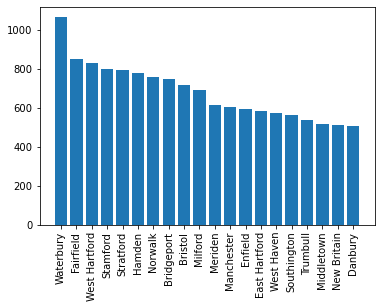

In [79]:
topcities = listings['City'].value_counts().sort_values(ascending=False).head(20)
print(topcities)


barx = topcities.index.values


plt.bar(barx,
        listings['City'].value_counts().head(20))

plt.xticks(rotation = 90)
plt.show()

Hartford      9134
New Haven     8618
Fairfield     8605
New London    3061
Litchfield    2293
Middlesex     2155
Tolland       1519
Windham       1134
Name: County, dtype: int64


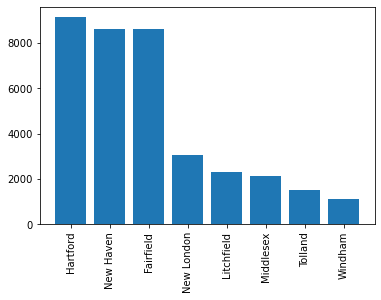

In [80]:
topcounty = listings['County'].value_counts().sort_values(ascending=False)
print(topcounty)


barx = topcounty.index.values


plt.bar(barx, listings['County'].value_counts())

plt.xticks(rotation = 90)
plt.show()



### B. Acres


In [81]:
print(listings['Acres'].describe())

count    36519.000000
mean         0.608062
std          0.540026
min          0.010000
25%          0.220000
50%          0.390000
75%          0.910000
max          2.510000
Name: Acres, dtype: float64


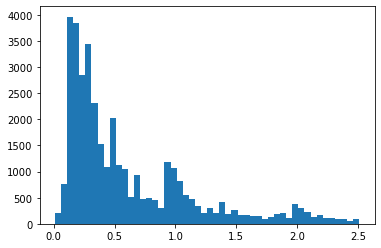

In [82]:
plt.hist(listings['Acres'], bins =50)
plt.show()

In [83]:
print(listings['Acres'].value_counts().head(20))

0.17    1138
0.23     915
0.11     839
0.14     834
0.18     766
1.00     745
0.46     711
0.21     688
0.29     675
0.28     675
0.22     667
0.26     667
0.24     636
0.16     632
0.25     632
0.20     629
0.19     626
0.15     594
0.34     587
0.35     573
Name: Acres, dtype: int64


### C. Sqft Total

In [84]:
print(listings['Sq Ft Total'].describe())

count    36519.000000
mean      1919.279772
std        721.121909
min        480.000000
25%       1362.000000
50%       1784.000000
75%       2348.000000
max       4512.000000
Name: Sq Ft Total, dtype: float64


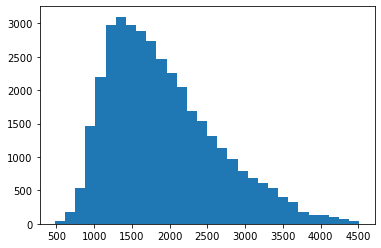

In [85]:
plt.hist(listings['Sq Ft Total'], bins =30)
plt.show()

log normal? natural log transformation

### D. Sq Ft Est Heated Above Grade

In [86]:
print(listings['Sq Ft Est Heated Above Grade'].describe())

count    36519.000000
mean      1731.152934
std        633.705494
min        396.000000
25%       1242.000000
50%       1572.000000
75%       2120.000000
max       3731.000000
Name: Sq Ft Est Heated Above Grade, dtype: float64


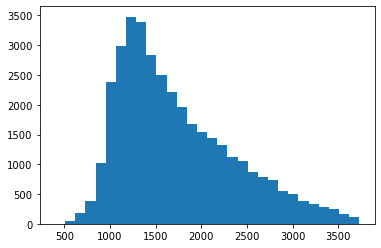

In [87]:
plt.hist(listings['Sq Ft Est Heated Above Grade'],bins = 30)
plt.show()

### E. Style

In [88]:
listings['Style'].value_counts()

Colonial             12801
Ranch                 8903
Cape Cod              7607
Raised Ranch          3242
Split Level           1462
Contemporary          1112
Bungalow               384
Other                  195
Antique                157
Cottage                148
Farm House             110
Half Duplex             98
Victorian               75
Hi-Ranch                68
Tudor                   35
Saltbox                 24
Row House               22
Mobile Home             16
Log                     14
Barn                    12
Modern                  11
A-Frame                  8
Chalet                   5
Chateau                  3
European                 3
Mediterranean            2
Georgian Colonial        1
Garden Ranch             1
Name: Style, dtype: int64

Colonial        12801
Ranch            8903
Cape Cod         7607
Raised Ranch     3242
Split Level      1462
Contemporary     1112
Name: Style, dtype: int64


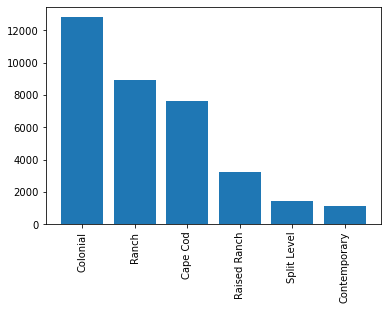

In [89]:
topstyle = listings['Style'].value_counts().sort_values(ascending=False).head(6)
print(topstyle)


barx = topstyle.index.values


plt.bar(barx,
        listings['Style'].value_counts().head(6))

plt.xticks(rotation = 90)
plt.show()


### F. Rooms Total

In [90]:
print(listings['Rooms Total'].describe())

count    36519.000000
mean         6.821983
std          1.424494
min          4.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: Rooms Total, dtype: float64


6     10040
7      8638
8      6400
5      5413
9      3417
10     1494
4      1117
Name: Rooms Total, dtype: int64


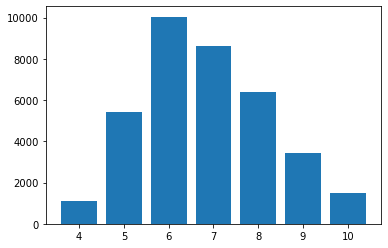

In [91]:
barvalue = listings['Rooms Total'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)

plt.show()



### G. Beds Total

In [92]:
print(listings['Beds Total'].describe())

count    36519.000000
mean         3.259865
std          0.681287
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Beds Total, dtype: float64


3    20748
4    10808
2     3748
5     1215
Name: Beds Total, dtype: int64


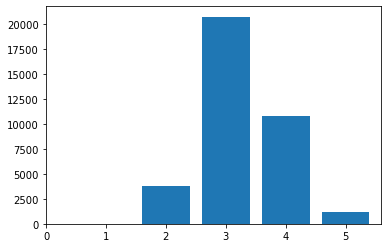

In [93]:
barvalue = listings['Beds Total'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(6)))
plt.show()


### H. Year Built

In [94]:
print(listings['Year Built'].describe())

count    36519.000000
mean      1957.413620
std         35.991118
min       1660.000000
25%       1946.000000
50%       1959.000000
75%       1978.000000
max       2021.000000
Name: Year Built, dtype: float64


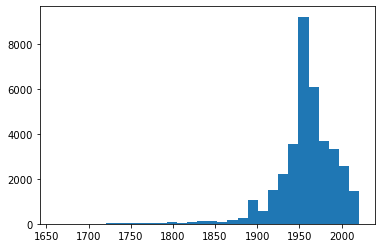

In [95]:
plt.hist(listings['Year Built'], bins =30)
plt.show()

### I. Days on Market

In [96]:
print(listings['DOM'].describe())

count    36519.000000
mean        43.885702
std         65.255918
min          0.000000
25%          5.000000
50%         24.000000
75%         62.000000
max       2009.000000
Name: DOM, dtype: float64


In [97]:
print(listings['DOM'].value_counts().head(20))

3.0     2608
4.0     2187
2.0     2137
5.0     1508
6.0     1101
1.0      996
7.0      823
8.0      630
9.0      521
10.0     490
12.0     454
11.0     444
13.0     421
0.0      410
21.0     399
65.0     394
14.0     386
15.0     376
64.0     369
18.0     359
Name: DOM, dtype: int64


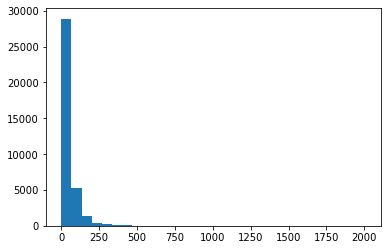

In [98]:
plt.hist(listings['DOM'],bins = 30)
plt.show()

### J .Listing Price

In [99]:
print(listings['list_price'].describe())

count    3.651900e+04
mean     3.633636e+05
std      2.467645e+05
min      1.000000e+04
25%      2.249000e+05
50%      2.990000e+05
75%      4.200000e+05
max      4.295000e+06
Name: list_price, dtype: float64


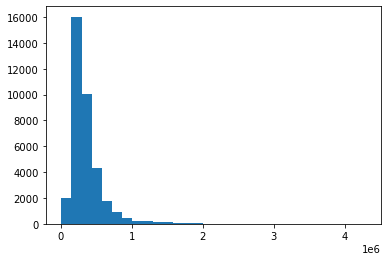

In [100]:
plt.hist(listings['list_price'], bins =30)
plt.show()

### K. Closing Price

In [101]:
print(listings['close_price'].describe())

count    3.651900e+04
mean     3.659042e+05
std      2.434707e+05
min      1.050000e+04
25%      2.290000e+05
50%      3.000000e+05
75%      4.250000e+05
max      4.250000e+06
Name: close_price, dtype: float64


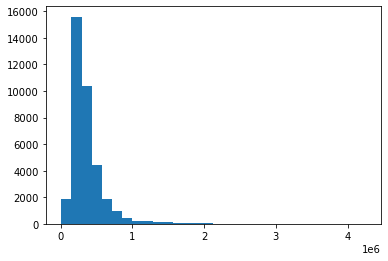

In [102]:
plt.hist(listings['close_price'], bins =30)
plt.show()

### L. Full Bath

In [103]:
print(listings['Full Bath'].describe())

count    36519.000000
mean         1.756510
std          0.656248
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Full Bath, dtype: float64


2    18639
1    13380
3     4496
0        4
Name: Full Bath, dtype: int64


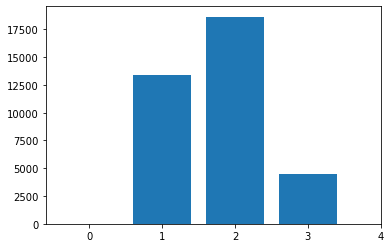

In [104]:
barvalue = listings['Full Bath'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(5)))
plt.show()


### M. Half Bath

In [105]:
print(listings['Half Bath'].describe())

count    36519.000000
mean         0.515074
std          0.543206
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Half Bath, dtype: float64


0    18536
1    17156
2      827
Name: Half Bath, dtype: int64


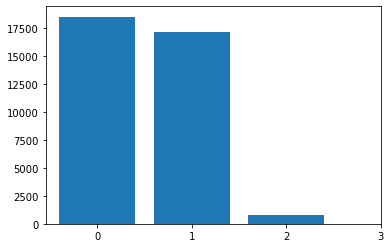

In [106]:
barvalue = listings['Half Bath'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(4)))
plt.show()


### Garage

2     16690
1     10153
0      8144
3      1178
4       263
5        49
6        25
8         7
7         6
14        1
12        1
11        1
9         1
Name: Garage, dtype: int64


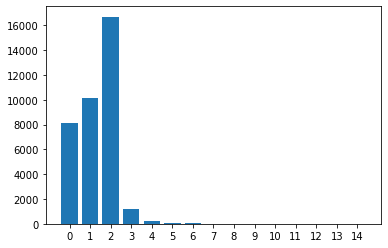

In [107]:
barvalue = listings['Garage'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(15)))
plt.show()


# Interactions and correlations

### By County

In [108]:
mean_close_price_by_county = listings['close_price'].groupby(listings['County']).mean()

In [109]:
mean_close_price_by_county 

County
Fairfield     573326.583033
Hartford      289400.872674
Litchfield    304408.708679
Middlesex     360578.787007
New Haven     306795.100719
New London    313503.950343
Tolland       279942.506912
Windham       248418.268078
Name: close_price, dtype: float64

In [110]:
prices_by_county = listings[['County','close_price']]

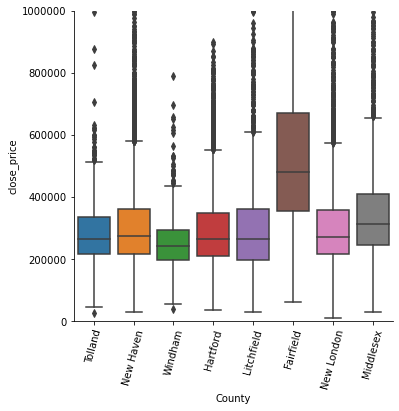

In [111]:
sns.catplot(x= 'County', y='close_price', kind="box", data = prices_by_county)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.ylim(0,1000000)
plt.xticks(rotation = 75)
plt.show()

['Tolland' 'New Haven' 'Windham' 'Hartford' 'Litchfield' 'Fairfield'
 'New London' 'Middlesex']


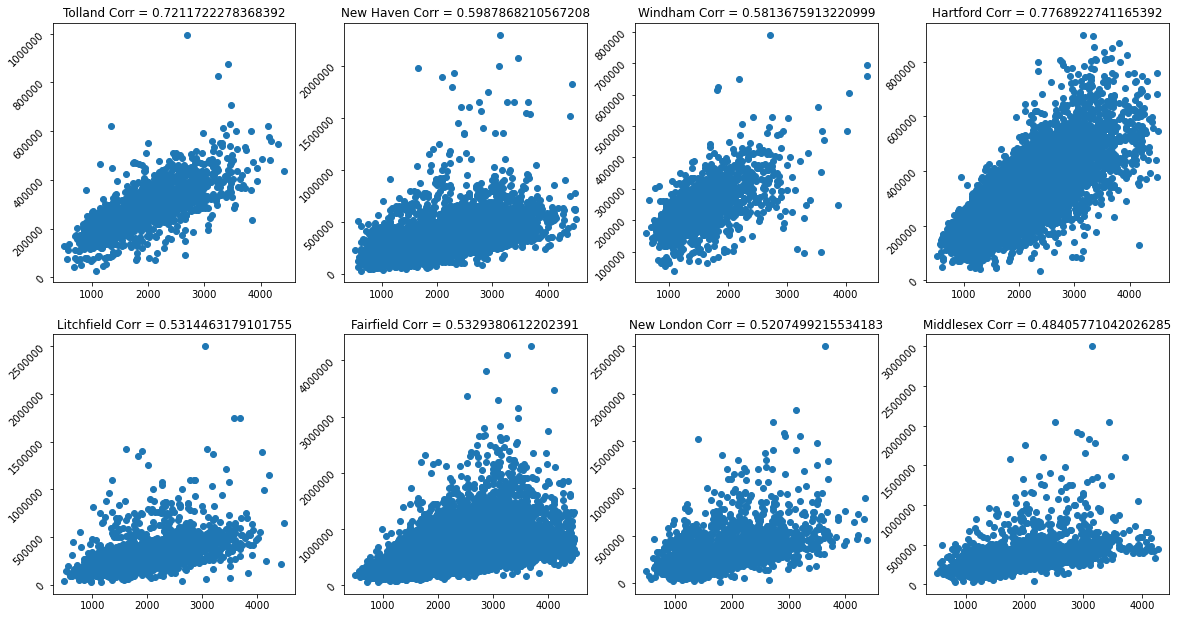

In [112]:
fig, axs = plt.subplots(2,4)
counties = listings['County'].unique()
print(counties)
counties = iter(counties)
fig.set_size_inches(20, 10.5)

for i in range(1,9):
        county = next(counties)
        county_df = listings[listings['County']==county]
        
        plt.subplot(2,4,i)
        plt.scatter(county_df['Sq Ft Total'],county_df['close_price'])
        corre= county_df['Sq Ft Total'].corr(county_df['close_price'])
        title = county + ' Corr = ' + str(corre)
        plt.title(title)
        
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.yticks(rotation=45)
               
plt.show()

In [113]:
def county_corr(col):
    sns.color_palette("pastel")
    fig, axs = plt.subplots(2,4)
    plt.suptitle("Closing Price vs. " + col + " by County")
    fig.tight_layout()
    
    counties = listings['County'].unique()
    counties = iter(counties)
    fig.set_size_inches(20, 10)

    for i in range(1,9):
        county = next(counties)
        county_df = listings[listings['County']==county]
        
        plt.subplot(2,4,i)
       
        sns.regplot(x=col, y='close_price',data =county_df,fit_reg=True,line_kws={"color": "red"})
        line_kws={"color": "red"}
        corre= round(county_df[col].corr(county_df['close_price']),2)
        title = county + ' Corr = ' + str(corre)
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel('Closing Price')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.yticks(rotation=45)
        
               
 

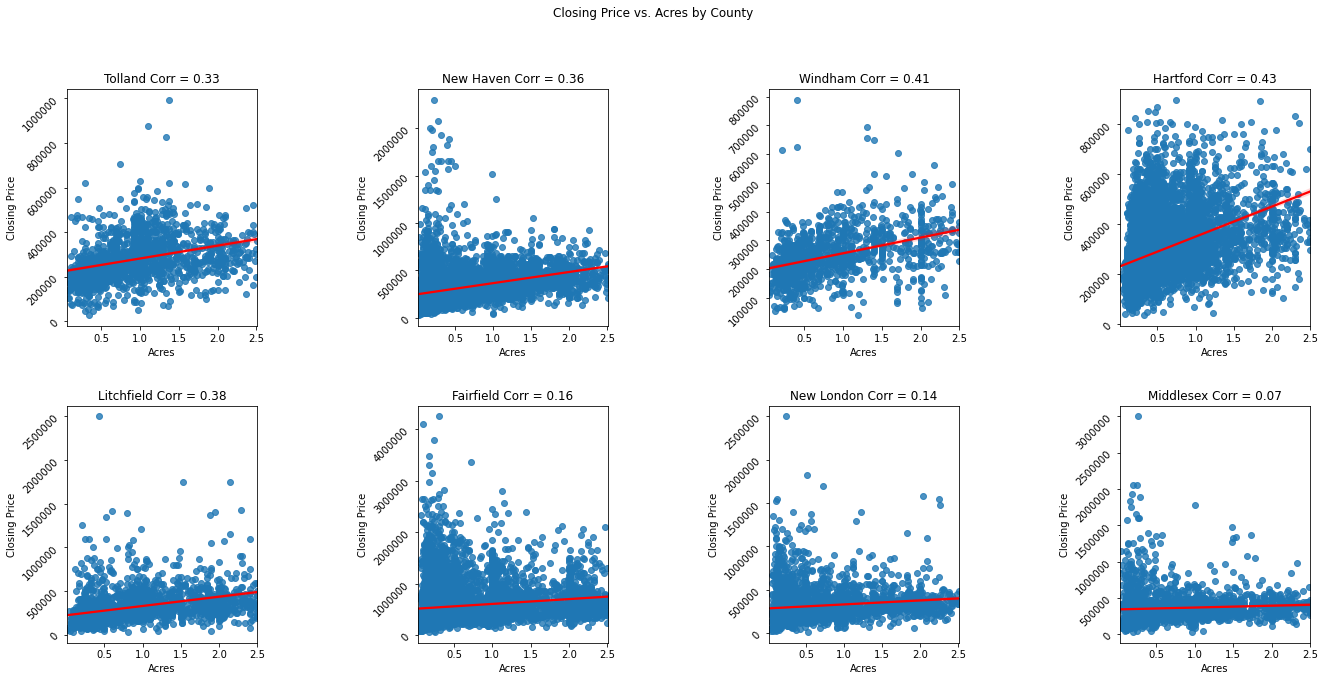

In [114]:
county_corr('Acres')

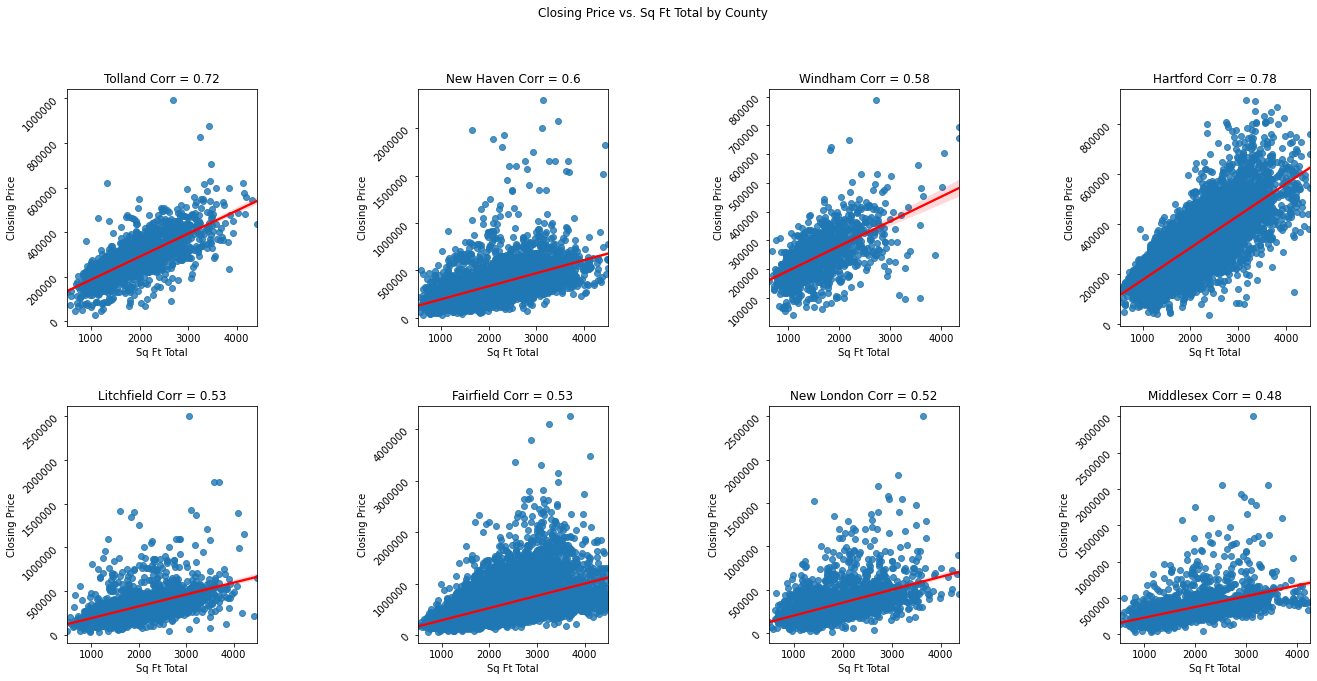

In [115]:
county_corr('Sq Ft Total')

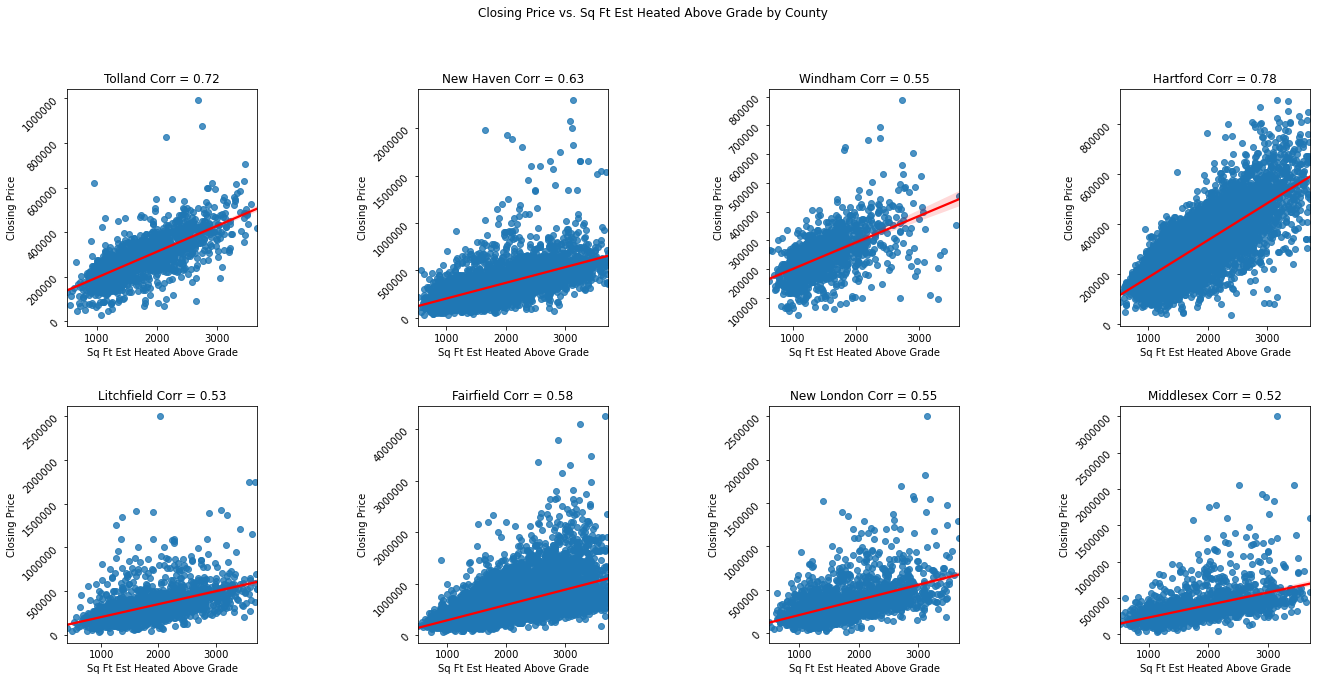

In [116]:
county_corr('Sq Ft Est Heated Above Grade')

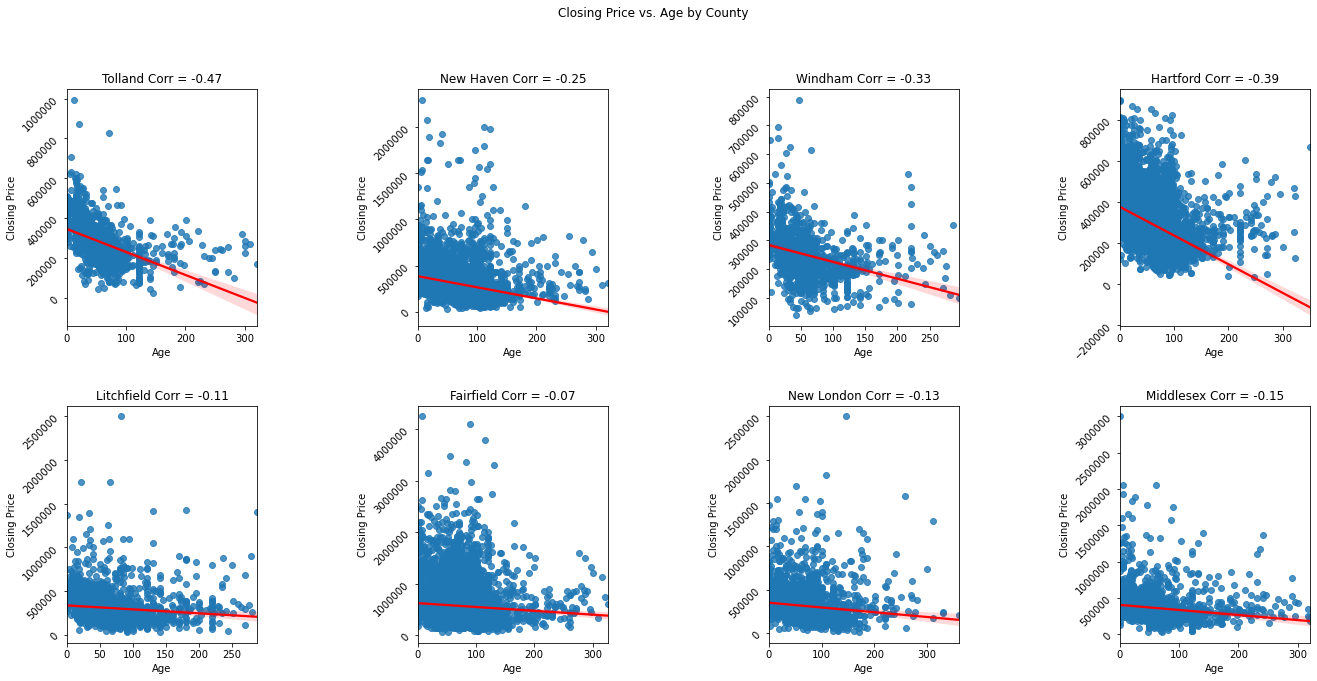

In [117]:
county_corr('Age')

### List Price vs Closing Price

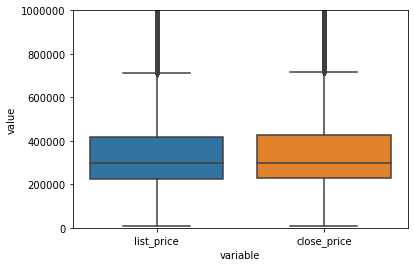

         list_price   close_price
count  3.651900e+04  3.651900e+04
mean   3.633636e+05  3.659042e+05
std    2.467645e+05  2.434707e+05
min    1.000000e+04  1.050000e+04
25%    2.249000e+05  2.290000e+05
50%    2.990000e+05  3.000000e+05
75%    4.200000e+05  4.250000e+05
max    4.295000e+06  4.250000e+06


In [118]:
close_list_df = pd.melt(listings[['list_price','close_price']])

sns.boxplot(x = 'variable', y = 'value', data = close_list_df)
plt.ylim(0,1000000)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.show()
print(listings[['list_price', 'close_price']].describe())

count    36518.000000
mean         0.012089
std          0.066966
min         -0.779322
25%         -0.018743
50%          0.000527
75%          0.040520
max          1.454545
dtype: float64


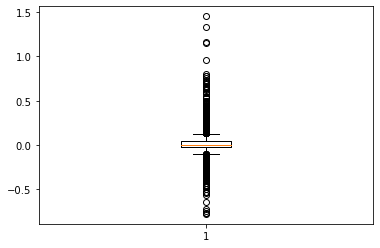

In [119]:
close_list_diff =listings[((listings['close_price']-listings['list_price'])/listings['list_price'])<5]
close_list_diff = (close_list_diff['close_price']-close_list_diff['list_price'])/close_list_diff['list_price']
print(close_list_diff.describe())
plt.boxplot(close_list_diff)
plt.show()

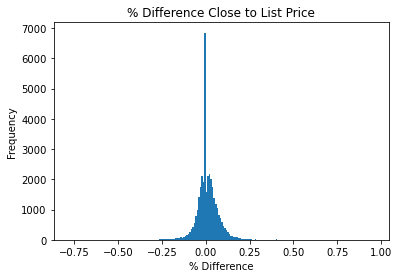

In [120]:
plt.hist(close_list_diff[close_list_diff<1], bins =200)
plt.title('% Difference Close to List Price')
plt.ylabel('Frequency')
plt.xlabel('% Difference')

plt.show()

In [121]:
print('The number of listings which sold below listing price was',len(close_list_diff[close_list_diff<0]), "listings.\n The number of listings which sold above listing price was",len(close_list_diff[close_list_diff>0]), 'listings.')
print('The number of listings which sold at listing prices was',len(close_list_diff[close_list_diff==0]))

The number of listings which sold below listing price was 12448 listings.
 The number of listings which sold above listing price was 19535 listings.
The number of listings which sold at listing prices was 4535


### Correlations

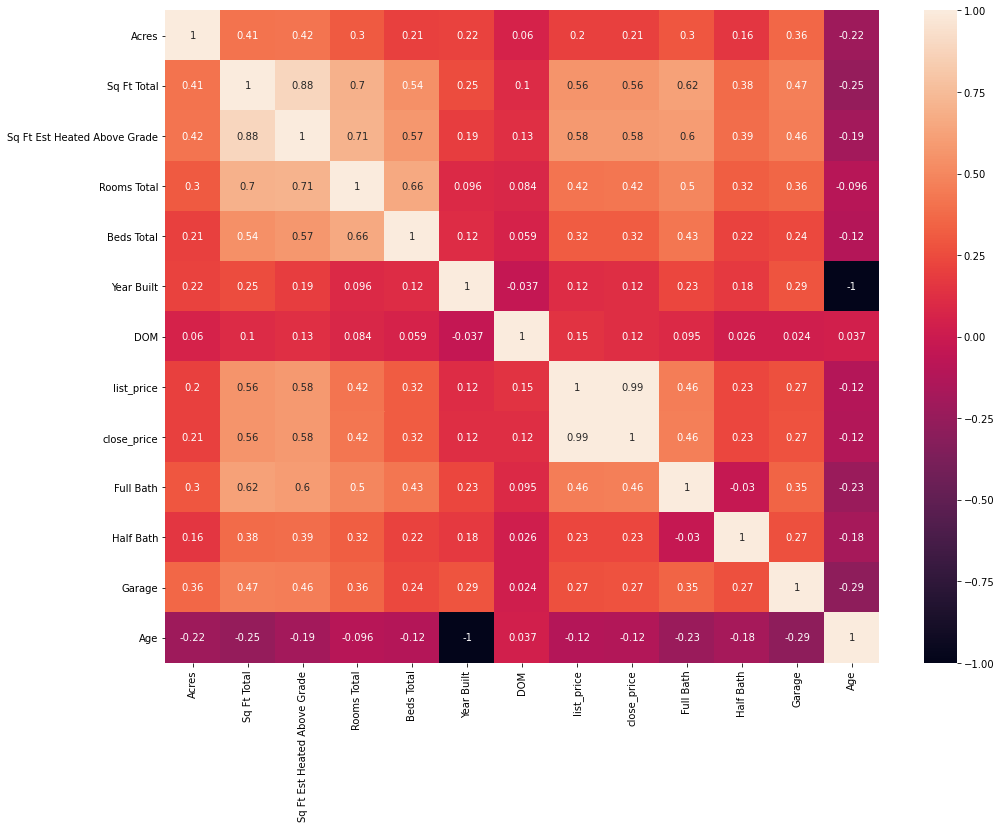

In [122]:
corr_matrix = listings.corr()
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        annot = True)
plt.show()

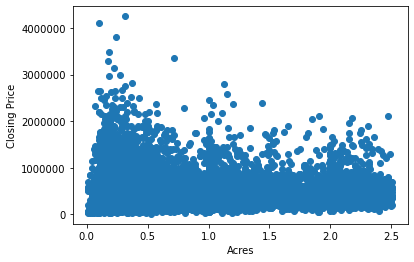

Pearson R between Closing Price and Acreage:  (0.20596885581162935, 0.0)


In [142]:
plt.scatter(listings['Acres'],listings['close_price'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Acres')
plt.ylabel('Closing Price')
plt.show()
print("Pearson R between Closing Price and Acreage: ", pearsonr(listings['Acres'],listings['close_price']))

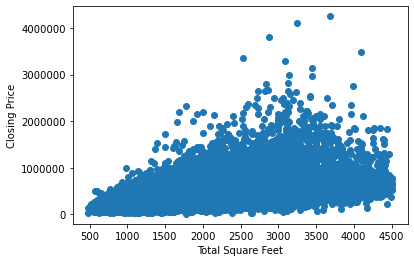

Pearson R between Closing Price and Total Square Feet:  (0.5617353767291612, 0.0)


In [143]:
plt.scatter(listings['Sq Ft Total'],listings['close_price'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Total Square Feet')
plt.ylabel('Closing Price')
plt.show()
print("Pearson R between Closing Price and Total Square Feet: ", pearsonr(listings['Sq Ft Total'],listings['close_price']))

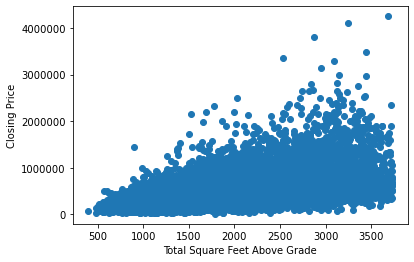

Pearson R between Closing Price and Total Square Feet above Grade:  (0.5816125930858991, 0.0)


In [144]:
plt.scatter(listings['Sq Ft Est Heated Above Grade'],listings['close_price'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Total Square Feet Above Grade')
plt.ylabel('Closing Price')
plt.show()
print("Pearson R between Closing Price and Total Square Feet above Grade: ", pearsonr(listings['Sq Ft Est Heated Above Grade'],listings['close_price']))

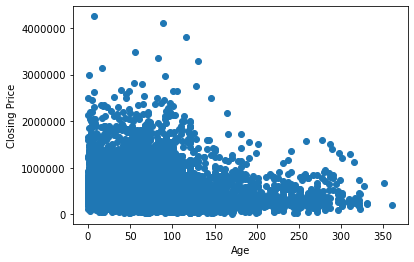

Pearson R between Closing Price and Age:  (-0.12282225307659005, 9.983546191433445e-123)


In [145]:
plt.scatter(listings['Age'],listings['close_price'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Age')
plt.ylabel('Closing Price')
plt.show()
print("Pearson R between Closing Price and Age: ", pearsonr(listings['Age'],listings['close_price']))


In [128]:
listings.columns

Index(['MLS#', 'Status Change Timestamp', 'Address', 'City', 'Acres',
       'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'list_price', 'close_price',
       'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County'],
      dtype='object')

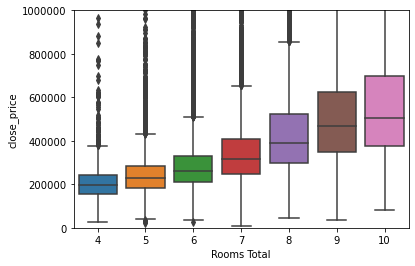

In [129]:
sns.boxplot(x ='Rooms Total', y = 'close_price', data = listings)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.ylim(0,1000000)
plt.show()

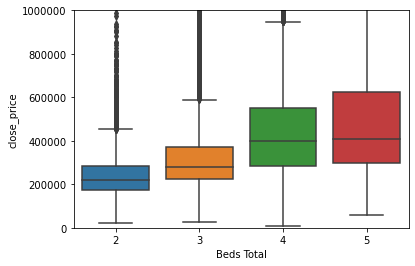

In [130]:
sns.boxplot(x = 'Beds Total', y = 'close_price', data = listings)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.ylim(0,1000000)
plt.show()

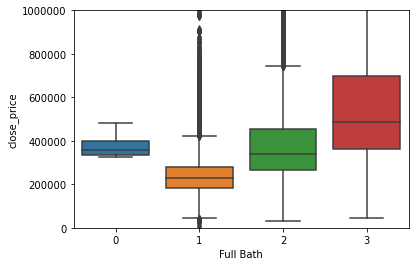

In [131]:
sns.boxplot(x = 'Full Bath', y = 'close_price', data = listings)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.ylim(0,1000000)
plt.show()

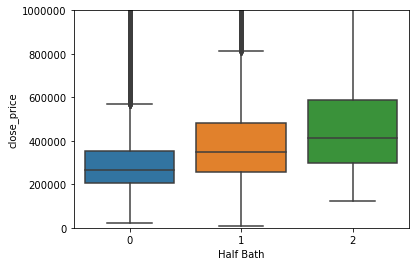

In [132]:
sns.boxplot(x = 'Half Bath', y = 'close_price', data = listings)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.ylim(0,1000000)
plt.show()

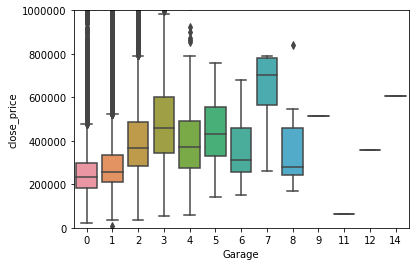

In [133]:
sns.boxplot(x = 'Garage', y = 'close_price', data = listings)
plt.ticklabel_format(useOffset=False, style='plain', axis ='y')
plt.ylim(0,1000000)
plt.show()

### Changes Over Time

In [134]:
close_time = listings[['Status Change Timestamp','close_price']]

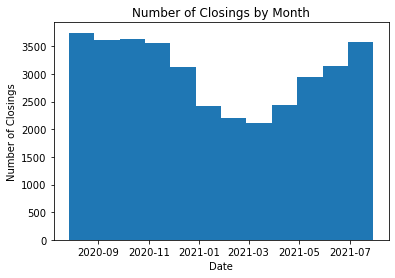

In [135]:
plt.hist(close_time['Status Change Timestamp'], bins =12)
plt.title('Number of Closings by Month')
plt.ylabel('Number of Closings')
plt.xlabel('Date')
plt.show()

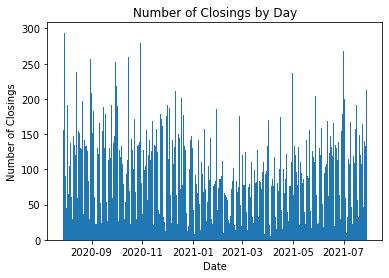

In [136]:
plt.hist(close_time['Status Change Timestamp'], bins = 365)
plt.title('Number of Closings by Day')
plt.ylabel('Number of Closings')
plt.xlabel('Date')
plt.show()

<AxesSubplot:xlabel='Status Change Timestamp', ylabel='close_price'>

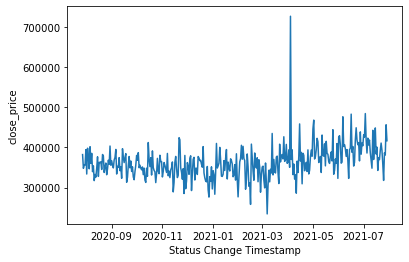

In [137]:
y = close_time.groupby('Status Change Timestamp').mean('close_price')
y = y.reset_index()
y = y.reset_index(drop = True)

sns.lineplot(x = 'Status Change Timestamp',y= 'close_price', data =y)

In [146]:
listings.to_csv(r'C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/posteda.csv')